# **Abstract**

The thoracic surgery dataset was collected between 2007 and 2011 at Wroclaw Thoracic Surgery Center in Poland. These patients went through major lung resections for primary lung cancer. 

Our aim is to be able to predict the post-operative life expectancy in the lung cancer patients survival period basing on the vector composed of 16 features.

# **I. Introduction**

Cancers can take many different forms depending on the cell of origin, location, spectrum of genomic alterations, and affect therapeutic response.  One of the main clinical decision problems in thoracic surgery after a lung cancer is detected, is the appropriate patient selection for the surgery, considering the risk and benefits for long and shor term for each patient.

 Various machine learning which are referred to as models are in use nowadays. **The choice of a specific model for a given problem is determined by the characteristics of the data and the biological context, meaning the desired outcome**. The number of unique data points is taken in consideration, for example, large data sets (of the order of 10^6) require more exotic deep learning algorithms while fewer data points require the classical techniques of machine learning such as logistic regression, decision-tree methods. These approaches segment data sets into regions according to fixed rules. Machine learning algorithms can be subdivided into three groups: supervised, unsupervised and semi-supervised algorithms. 
 
 Supervised learning, as the name suggests involves training the model with labeled data, meaning that the input data already has the correct output associated with it. 
 
 In unsupervised learning, the model trains itself on data. This approach involves clustering, for example, Google’s AlphaGo Zero is a very sophisticated unsupervised learning algorithm. 
 
 Semi-supervised learning deals with semi-labeled data. The standard choice in outcomes is between classification and regression. 

Classification is used when data has a qualitative label while regression is used to predict continuous variables.


 In this project, we developed an open source, completely automated tool based on different machine learning approaches to make the analysis more efficient and transferrable.

## **II. Data preprocessing**

The original file is in `.arff` extension, here's a small code that shows how to convert `.arff` files to .csv 

Indeed, the `.csv` format is very flexible as it permits to manipulate the data easily and safely by using `pandas` library.

In [ ]:
import os

file = "ThoraricSurgery.arff"

def toCsv(content): 
    data = False
    header = ""
    newContent = []
    for line in content:
        if not data:
            if "@attribute" in line:
                attri = line.split()
                columnName = attri[attri.index("@attribute")+1]
                header = header + columnName + ","
            elif "@data" in line:
                data = True
                header = header[:-1]
                header += '\n'
                newContent.append(header)
        else:
            newContent.append(line)
    return newContent

with open(file , "r") as inFile:
  content = inFile.readlines()
  name,ext = os.path.splitext(inFile.name)
  new = toCsv(content)
  with open(name+".csv", "w") as outFile:
    outFile.writelines(new)

Once the conversion is done, we can read the file containing the dataset using `pandas` library.

In [ ]:
import pandas as pd
df = pd.read_csv('ThoraricSurgery.csv')

Let's take a look at the data:

In [ ]:
print(df)

      DGN  PRE4  PRE5  PRE6 PRE7 PRE8  ... PRE19 PRE25 PRE30 PRE32 AGE Risk1Yr
0    DGN2  2.88  2.16  PRZ1    F    F  ...     F     F     T     F  60       F
1    DGN3  3.40  1.88  PRZ0    F    F  ...     F     F     T     F  51       F
2    DGN3  2.76  2.08  PRZ1    F    F  ...     F     F     T     F  59       F
3    DGN3  3.68  3.04  PRZ0    F    F  ...     F     F     F     F  54       F
4    DGN3  2.44  0.96  PRZ2    F    T  ...     F     F     T     F  73       T
..    ...   ...   ...   ...  ...  ...  ...   ...   ...   ...   ...  ..     ...
465  DGN2  3.88  2.12  PRZ1    F    F  ...     F     F     T     F  63       F
466  DGN3  3.76  3.12  PRZ0    F    F  ...     F     F     T     F  61       F
467  DGN3  3.04  2.08  PRZ1    F    F  ...     F     F     F     F  52       F
468  DGN3  1.96  1.68  PRZ1    F    F  ...     F     F     T     F  79       F
469  DGN3  4.72  3.56  PRZ0    F    F  ...     F     F     T     F  51       F

[470 rows x 17 columns]


As you can see, this dataset contains numerical features and categorical features. Only 4 of the features are numerical while the all the other features are categorical. Note that the classification column is called Risk1Yr (1 year survival period) and is denoted `True` if the patient has died.

Before applying any machine learning algorithm, dimensionality reduction needs to be applied. Why? Because having many features increases the variance in data which leads to overfitting issues. Consequently, having too many features are not useful. In fact, most of the time some of the features are redundant. This is why we need the dimensionality reduction techniques. 

There are few techniques available for Dimentionality reduction by the `prince` package in Python (e.g. PCA, CA, MCA..etc.). The choice of the package depends on **the type of the data** . For example, Principal Component Analysis (PCA) can be performed when all the features are numerical, while Multiple Correspondance Analysis (MCA) are perfomed when you have three or more categorical features. 

Since we have more than three categorical features in our dataset, we will use the MCA approach. Later, we will encode our nominal categories into number and thus perform PCA.



In [ ]:
!pip install prince

**- Multiple Correspondance Analysis**

In [ ]:
#features
X = df.iloc[:,0:16]
#classification
Y = df.iloc[:,-1] 

#prince is the library we need to perform MCA
import prince

mca = prince.MCA()
mca = mca.fit(X) 
X_transformed = mca.transform(X) 

# **III. Classification algorithms**

**a) Logistic regression**

Once the data is transformed, we can start applying machine learning algorithms. One of the basic algorithms for binary classification problems is logistic regression. This statistical model uses a logistic function to model binary dependent variables. In our case, the `Y ` variable has two possible values: `True` or `False` so it may be good to start with this simple classification approach.



In [ ]:
# =============================================================================
# logistic regression
# =============================================================================
from sklearn import linear_model
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


#creating the model
logreg = linear_model.LogisticRegression()

# splitting the data into two sets : test and train 
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42)

#Train the model
logreg.fit(X_train, y_train)

#compute Z parameters to calculate the accuracy
Z = logreg.predict(X_test)

acc_reg=metrics.accuracy_score(y_test, Z)

print("Accuracy:",acc_reg)

Accuracy: 0.8333333333333334


The accuracy measure gives the information of how often the algorithm classifies a data point correctly. The accuracy of the logistic model applied on the dataset is equal to 0.83 as you can see above, which mean that the model is able to give about 83%  of correct predictions for the test data. The accuracy can be calculated easily by dividing the number of correct predictions by the number of total predictions.

**b) Decision Trees**

The decision tree learning is used as predictive model that goes from the observation, represented as branches to the conclusions represented as leaves. In tree models the outcome variable can take a discrete set of values or continuous values. Trees where the outcome variables take discrete values are called classification trees. Since Thoracic Surgery dataset contains discrete target variables, we will use classification trees algorithm.

In this algorithm, the Gini impurity measures how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
The Gini impurity is calculated using the following formula:

  `sum of (𝑝k) = 1-  𝑝𝑖 `

Here, 𝑝𝑖 represents the probability of a mistake in categorizing an item with label 𝑖.  The classification tree can be printed in the kernal or exported as a figure, the Gini impurity values are indicated at each leaf. When the Gini impurity value reaches its minimum (zero), the classes in the node fall into a single target category.

|--- feature_1 <= -0.09
|   |--- feature_1 <= -0.09
|   |   |--- feature_1 <= -0.14
|   |   |   |--- feature_1 <= -0.15
|   |   |   |   |--- feature_1 <= -0.20
|   |   |   |   |   |--- feature_1 <= -0.23
|   |   |   |   |   |   |--- feature_1 <= -0.23
|   |   |   |   |   |   |   |--- feature_0 <= -0.14
|   |   |   |   |   |   |   |   |--- feature_0 <= -0.16
|   |   |   |   |   |   |   |   |   |--- class: F
|   |   |   |   |   |   |   |   |--- feature_0 >  -0.16
|   |   |   |   |   |   |   |   |   |--- class: T
|   |   |   |   |   |   |   |--- feature_0 >  -0.14
|   |   |   |   |   |   |   |   |--- class: F
|   |   |   |   |   |   |--- feature_1 >  -0.23
|   |   |   |   |   |   |   |--- class: T
|   |   |   |   |   |--- feature_1 >  -0.23
|   |   |   |   |   |   |--- class: F
|   |   |   |   |--- feature_1 >  -0.20
|   |   |   |   |   |--- feature_1 <= -0.18
|   |   |   |   |   |   |--- feature_0 <= -0.09
|   |   |   |   |   |   |   |--- feature_0 <= -0.17
|   |   |   |   |   |   |   | 

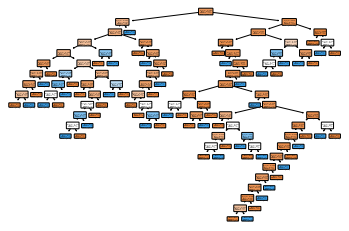

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

from sklearn import tree

#1st possibility is to export the tree as a figure in a pdf file
tree.plot_tree(clf, filled=True, rounded=True)
plt.savefig('tree.pdf')

# 2nd possibility is to print it 
text_representation = tree.export_text(clf)
print(text_representation)


Let's take a look at the accuracy and see how good is the model doing. 


In [ ]:
y_pred = clf.predict(X_test)

acc_decision_tree= metrics.accuracy_score(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7588652482269503


The accuracy here is equal to 0.75, which means that the algorithm is able to predict 75% of the data correctly

**- Principal Component Analysis**

As mentioned before, several dimensional reduction approaches exist, we previously used MCA. In this section, **we just want to show that it is possible to encode the data and use PCA**. **Note that both methods can be used, and the choice of one of them is determined by the dataset you have.**

In [ ]:
# Here's an example of how you encode your categorical data
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
#Encode labels in column 'DGN'.

df['DGN']= label_encoder.fit_transform(df['DGN'])

#Encode labels PRE6, 7, 8..
for i in range(6, 11):
    df['PRE'+str(i)]= label_encoder.fit_transform(df['PRE'+str(i)])


#Encode labels PRE11, PRE14, PRE17 
for i in range(11, 20, 3):
    df['PRE'+str(i)]= label_encoder.fit_transform(df['PRE'+str(i)])

#Encode the rest
df['PRE19']= label_encoder.fit_transform(df['PRE19'])
df['PRE25']= label_encoder.fit_transform(df['PRE25'])
df['PRE30']= label_encoder.fit_transform(df['PRE30'])
df['PRE32']= label_encoder.fit_transform(df['PRE32'])

X = df.iloc[:,0:16]

#Class Distribution: the class value (Risk1Y) is binary valued. 

Y = df.iloc[:,-1]

In [ ]:
#check

print(df)

     DGN  PRE4  PRE5  PRE6  PRE7  PRE8  ...  PRE19  PRE25  PRE30  PRE32  AGE  Risk1Yr
0      1  2.88  2.16     1     0     0  ...      0      0      1      0   60        F
1      2  3.40  1.88     0     0     0  ...      0      0      1      0   51        F
2      2  2.76  2.08     1     0     0  ...      0      0      1      0   59        F
3      2  3.68  3.04     0     0     0  ...      0      0      0      0   54        F
4      2  2.44  0.96     2     0     1  ...      0      0      1      0   73        T
..   ...   ...   ...   ...   ...   ...  ...    ...    ...    ...    ...  ...      ...
465    1  3.88  2.12     1     0     0  ...      0      0      1      0   63        F
466    2  3.76  3.12     0     0     0  ...      0      0      1      0   61        F
467    2  3.04  2.08     1     0     0  ...      0      0      0      0   52        F
468    2  1.96  1.68     1     0     0  ...      0      0      1      0   79        F
469    2  4.72  3.56     0     0     0  ...      0    

Now that all the features became numerical, we can peform PCA

In [ ]:
from sklearn.decomposition import PCA

# initiate PCA and classifier
pca = PCA()


#Fit the model with X and apply the dimensionality reduction on X.
X_transformed = pca.fit_transform(X)

Let's apply logistic regression and see how the algorithm classifies the data:

In [ ]:
#creating the model
logreg = linear_model.LogisticRegression()

# splitting the data into two sets : test and train 
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y, test_size=0.33, random_state=42)

#Train the model
logreg.fit(X_train, y_train)

#compute Z parameters to calculate the accuracy
Z = logreg.predict(X_test)

acc_reg=metrics.accuracy_score(y_test, Z)

print("Accuracy:",acc_reg)

Accuracy: 0.8333333333333334


The result we obtain is the same as the previous one. Again, the choice of the dimentionality reduction method depends on the dataset.

# **III. Discussion**

 Reducing dimensions at the beginning of the implementation was a very important step. Without it, the data could prone to overfitting. The accuracy metric we used to evaluate our model gives very satisfying results. But **accuracy is dangerously misleading**. Actually, if you take a closer look to the dataset, you will notice that this dataset is **imbalanced** meaning that the classes are not equally represented. 

In [ ]:
df['Risk1Yr'].describe()

count     470
unique      2
top         F
freq      400
Name: Risk1Yr, dtype: object

As you can see, 400 classes belong to the category False which means that these patients have survived more than one year after the surgery, while only 70 classes are labeled True (patients have died).

There are many possible approaches to combat imbalanced training data such as: collecting more data, changing the performance metric, resampling the dataset..etc.

One of the many performance metrics that allow you to evalute your model is the confusion matrix. The confusion matrix is a table that shows the correct predictions (represented in the diagonal) and the types of incorrect predictions. Other metrics are roc curves, recall, precision ...etc. 



Let's represent the confusion matrix for the tree decision model we implemented above

Text(0.5, 1.0, 'Confusion matrix for Tree Decision Classifier')

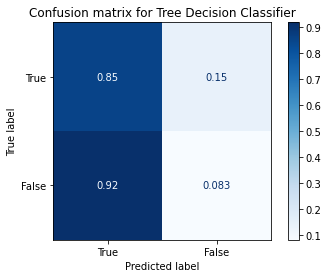

In [ ]:
from sklearn.metrics import plot_confusion_matrix #confusion matrix 

plot_confusion_matrix(clf, X_test, y_test, cmap='Blues', normalize='true',
                      display_labels=['True', 'False']);
plt.title("Confusion matrix for Tree Decision Classifier")



It is clear that the model misclassifies the data labeled False. In 92% of the cases, data labeled as False is classified as True because of the imbalanced traning data set explained above.

Zieba and collegues [[1]](https://dx.doi.org/10.1016/j.asoc.2013.07.016) developed a boosted Support Vector Machine to overcome the imbalance problem. By adding an additional penalty to their model, they managed to extract new rules from the imbalanced dataset and thus classify the data accurately.

# **Conclusion**

Machine learning has is widely used nowadays. A machine learning model can be supervised, semi- supervised or unsupervised. **The topic, the type of the outcome variable, and the nature of the dataset determine which strategy to use to perform the analysis.**